<a href="https://colab.research.google.com/github/RodrigoLarroca/Beer/blob/main/PrimeraEntrega_Larroca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS Y PREDICCION EN INGREDIENTES Y OPINION DE CERVEZAS**



Integrantes: Larroca Rodrigo


**CONTEXTO COMERCIAL:** 

Trabaja en una consultora privada de datos, donde un cliente del rubro de cervezas requiere sus servicios para encontrar el **optimo gusto** en su nuevo proyecto de cerveza. El mercado actual presenta mucha demanda debido a las fechas festivas, por lo cual es imperante para el cliente obtener resultados en un tiempo determinado. Es función del equipo determinar qué gustos/aromas/estilo de cerveza es el de mas gustado y por ende el posible mas consumido.

**PROBLEMA COMERCIAL:** 

Se espera mejorar la eleccion de ingredientes en base a opiniones de personas.
¿Existen patrones particulares en los ingredientes de las cervezas que puedan ser indicativos de opioniones excelentes?

**CONTEXTO ANALITICO:** 




El equipo consiguio datos sobre una gran cantidad de cervezas, su composicion, sus gustos y opiones realizadas a 3200 personas. Los datos aquí no estarán etiquetados; es decir, no hay una variable que nos diga cuáles de estas opiniones son buenas o no. En su lugar, debemos utilizar modelos de agrupamiento para abordar este problema de aprendizaje no supervisado.

El caso se estructura de la siguiente manera:
 

1.   Realizar análisis de datos exploratorios para investigar visualmente la estructura de los datos.
2.   Utilizar estas observaciones para guiar nuestra metodología de agrupamiento y ajustar los modelos adecuados.
3.   Discutir las ventajas y limitaciones de los métodos de agrupamiento típicos.
4.   Segmentar y generar conclusiones sobre grupos específicos.






**HIPOTESIS:**

Utilizando un conjunto de datos que incluyen información sobre los ingredientes utilizados en diferentes cervezas, así como las opiniones de clientes sobre esas cervezas, se puede entrenar un modelo de aprendizaje automático que sea capaz de predecir qué ingredientes se utilizarán en una cerveza determinada, y cuál será la opinión del cliente sobre esa cerveza. Esto podría ayudar a los cerveceros a mejorar la calidad de sus productos ya satisfacer mejor las necesidades y gustos de sus clientes.

El conjunto de datos principal ( beer.csv) contiene las siguientes columnas:

*   Nombre : Nombre de la cerveza (etiqueta)
*   Estilo : Estilo de la cerveza
*   Cervecería : Nombre de la cervecería
*   Nombre de la cerveza (completo) : Nombre completo de la cerveza -- identificador único para cada cerveza
*   Descripción : Notas en la cerveza si está disponible
*   ABV : Contenido de alcohol de la cerveza (% por volumen)
*   Min IBU : El valor mínimo de IBU
*   Max IBU: El valor máximo de IBU

Las siguientes once columnas representan las características del perfil de degustación de la cerveza.

(Sensación en boca)
*   Astringencia
*   Cuerpo
*   Alcohol

(Sabor)
*   Amargo
*   Dulce
*   Agrio
*   Salado

(Sabor Y Aroma)
*   Frutas
*   Lúpulo
*   Especias
*   Malta

Las últimas seis columnas contienen información de reseñas
*   opinión _ aroma
*   opinión _ aspecto
*   opinión _ paladar
*   opinión _ sabor
*   opinión _ general
*   número _ de _ opiniones



# **Instalacion, librerias y conjunto de datos**

In [108]:
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sidetable
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import plotly.graph_objects as go
import plotly.express as px
import xgboost as xgb
import imblearn
import statsmodels.formula.api as sm
import statsmodels.api as sm


from imblearn.over_sampling import SMOTEN
from datetime import datetime
from pandas.api.types import is_numeric_dtype
from scipy import stats
from xgboost import XGBClassifier

from sklearn.decomposition import PCA         #transformacion PCA
from sklearn.linear_model import LogisticRegression #regresion logistica
from sklearn.linear_model import Lasso #seleccion de caracteristicas
from sklearn.tree import DecisionTreeClassifier #modelos tipo arbol de decision
from sklearn.neighbors import KNeighborsClassifier #modelos Knn
from sklearn.svm import SVC #modelos SVC
from sklearn.ensemble import RandomForestClassifier #modelos de random forest
from sklearn.model_selection import train_test_split #partir datos en conjuntos de entrenamiento y validacion
from sklearn.model_selection import KFold #partir datos en k- folds
from sklearn.model_selection import cross_val_score #evaluar algoritmos en cross validacion
from sklearn.model_selection import GridSearchCV #para la selección de características con lazo
from sklearn.model_selection import RandomizedSearchCV #para ecoger menores hiperparametros del xgboost
from sklearn.metrics import balanced_accuracy_score #manejo de metricas de desempeño
from sklearn.metrics import confusion_matrix #manejo de matrices de confusion
from sklearn.preprocessing import OneHotEncoder   #dividir una variable entre varias columnas y determinar valor verdadero o falso
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score, auc, roc_auc_score #metricas matrix
from sklearn.ensemble import RandomForestRegressor #para RFECV
from sklearn.feature_selection import SelectFromModel #
from sklearn.feature_selection import RFECV #Recurvise feature elimination with cross validation
from sklearn.decomposition import TruncatedSVD #SVD selección de características
from sklearn.pipeline import Pipeline
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

%matplotlib inline
plt.style.use('ggplot')
sns.set(style="darkgrid")

In [110]:
beer = data = pd.read_csv('beer.csv')
pd.options.display.max_columns = None
beer.head(1)

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497


# **DATA WRANGLING Y EDA**

In [111]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

Como estamos interesados en la composicion, nos seria util un valor de ibu (promedio), creamos una nueva columna llamada IBUProm:
Para la division en grupos se puede trabajar de manera mas comoda con las opiniones expresadas en letras:


In [112]:
data['IBUProm'] = (beer['Min IBU'] + beer['Max IBU'])/2


condiciones= [
              (beer['review_overall']>4.5 ) & (beer['review_overall']<=5 ),   
              (beer['review_overall']>3 ) & (beer['review_overall']<=4.5 ),
              (beer['review_overall']>2 ) & (beer['review_overall']<=3 ),
              (beer['review_overall']>1) & (beer['review_overall']<=2 ), 
              (beer['review_overall']<=1)
]
opciones = ['Perfecta','Muy buena','Buena','Mala','Muy mala']
data['Opinion'] = np.select(condiciones, opciones,default='Not Specified')


pd.options.display.max_rows = None
beer.head(1)

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,IBUProm,Opinion
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497,37.5,Muy buena


In [113]:
beer.shape

(3197, 27)

In [114]:
df = pd.DataFrame(beer)
df.head(1)

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,IBUProm,Opinion
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497,37.5,Muy buena


In [115]:
df.isnull().sum()

Name                 0
Style                0
Brewery              0
Beer Name (Full)     0
Description          0
ABV                  0
Min IBU              0
Max IBU              0
Astringency          0
Body                 0
Alcohol              0
Bitter               0
Sweet                0
Sour                 0
Salty                0
Fruits               0
Hoppy                0
Spices               0
Malty                0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
review_overall       0
number_of_reviews    0
IBUProm              0
Opinion              0
dtype: int64

In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ABV,3197.0,6.526688,2.546997,0.000000,5.000000,6.000000,7.600000,57.500000
Min IBU,3197.0,21.180482,13.242242,0.000000,15.000000,20.000000,25.000000,65.000000
Max IBU,3197.0,38.986863,21.355281,0.000000,25.000000,35.000000,45.000000,100.000000
Astringency,3197.0,16.515796,10.410661,0.000000,9.000000,14.000000,21.000000,81.000000
Body,3197.0,46.129496,25.947842,0.000000,29.000000,40.000000,58.000000,175.000000
Alcohol,3197.0,17.055990,17.331334,0.000000,6.000000,11.000000,22.000000,139.000000
Bitter,3197.0,36.364404,25.791152,0.000000,17.000000,31.000000,52.000000,150.000000
Sweet,3197.0,58.270879,34.281310,0.000000,33.000000,54.000000,77.000000,263.000000
Sour,3197.0,33.145449,35.780172,0.000000,11.000000,22.000000,42.000000,284.000000
Salty,3197.0,1.017204,2.132651,0.000000,0.000000,0.000000,1.000000,48.000000


**Insights:**


*   El dataset cuenta con 3197 filas y 27 columnas
*   No existen datos nulos
*   Se creo una columna con el IBU promedio y review en letras-
*   Al existir tantas cervezas se analizara segun estilos y dividira en grupos de opiniones
*   Existen columnas innecesarias a los casos del analisis (Brewery,	Beer Name(Full),	Description) 
*   Puede existir valores muy extremos, por ej valores 0 min y 60 max con 6 de media. Se buscara analizar por grupos entonces.



# **En general, ¿Los distintos gustos en las cervezas que opinion tiene?, ¿qué influye mas en la opinion?** 

Esta matriz de correlacion sera usada en lo que sigue del proyecto. Se informa.

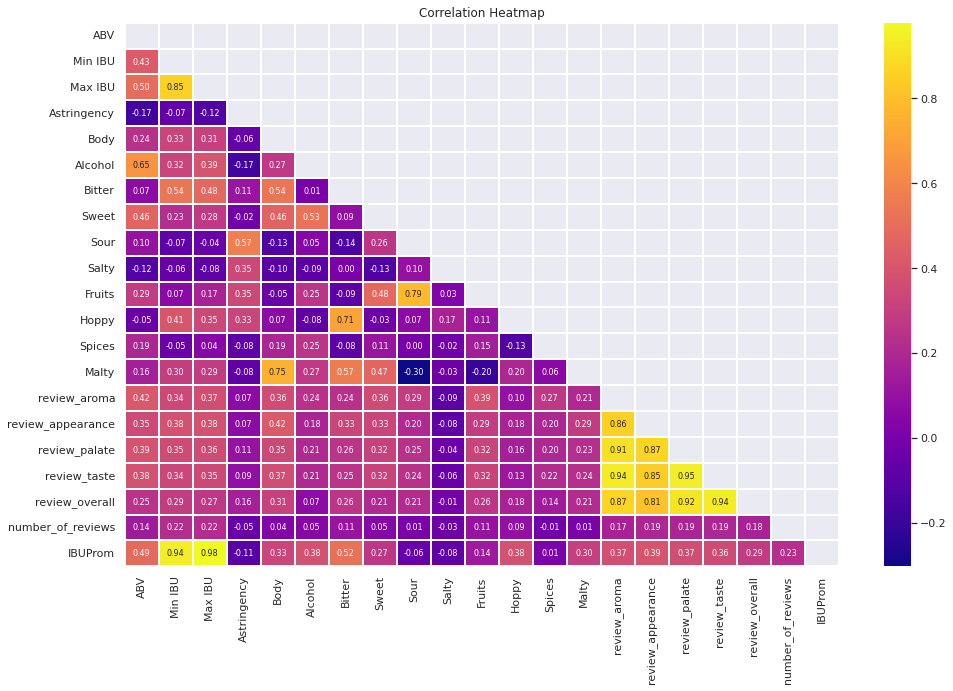

In [117]:
plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(beer.corr(),dtype = bool))
sns.heatmap(beer.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

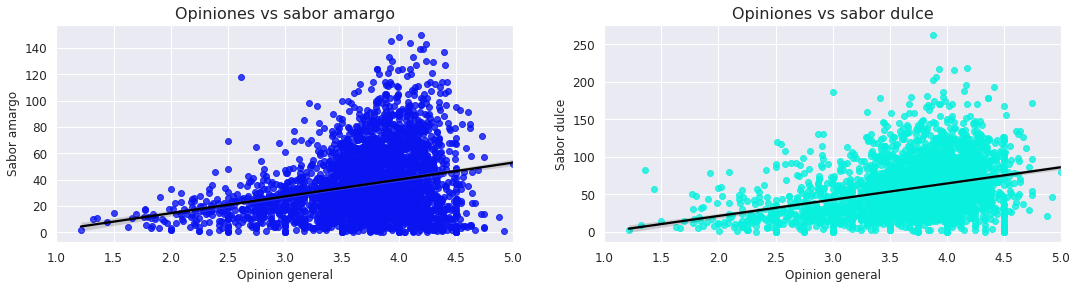

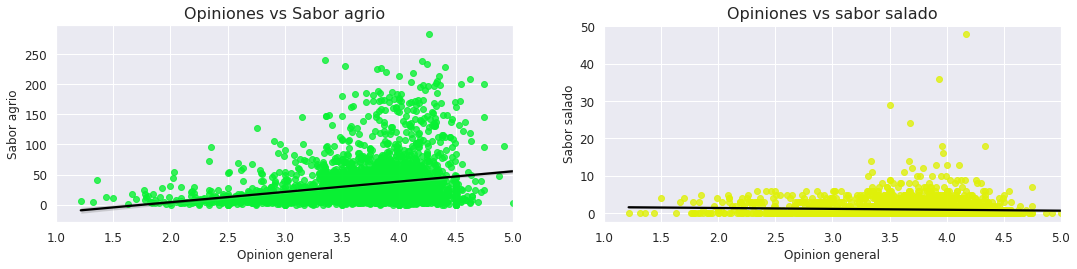

In [118]:
#Opiniones vs sabor amargo
plt.figure(figsize=(18,4))
plt.subplot(121)
sns.regplot(x=df["review_taste"], y=df["Bitter"], scatter_kws={"color": "#0914F1"}, line_kws={"color": "black"})
plt.yticks(fontsize=12)
plt.ylabel('Sabor amargo', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(1, 5)
plt.xlabel('Opinion general', fontsize=12)
plt.title('Opiniones vs sabor amargo', fontsize=16);

#Opiniones vs sabor dulce
plt.subplot(122)
sns.regplot(x=df["review_taste"], y=df["Sweet"], scatter_kws={"color": "#09F1DF"}, line_kws={"color": "black"})
plt.yticks(fontsize=12)
plt.ylabel('Sabor dulce', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(1, 5)
plt.xlabel('Opinion general', fontsize=12)
plt.title('Opiniones vs sabor dulce', fontsize=16);

#Opiniones vs sabor agrio
plt.figure(figsize=(18,8))
plt.subplot(221)
sns.regplot(x=df["review_taste"], y=df["Sour"], scatter_kws={"color": "#09F133"}, line_kws={"color": "black"})
plt.yticks(fontsize=12)
plt.ylabel('Sabor agrio', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(1, 5)
plt.xlabel('Opinion general', fontsize=12)
plt.title('Opiniones vs Sabor agrio', fontsize=16);

#Opiniones vs sabor salado
plt.subplot(222)
sns.regplot(x=df["review_taste"], y=df["Salty"], scatter_kws={"color": "#DFF109"}, line_kws={"color": "black"})
plt.yticks(fontsize=12)
plt.ylabel('Sabor salado', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(1, 5)
plt.xlabel('Opinion general', fontsize=12)
plt.title('Opiniones vs sabor salado', fontsize=16);
plt.show()

Hay mayores opiones positivas segun mas amargor tenga. En general una cerveza amarga gusta mas. Pero en valores de 0 y 80 se nota mucho mas.

Hay mayores opiones positivas segun mas dulzura tenga. En general una cerveza dulce gusta mas. Pero en valores de 0 y 100 se nota mucho mas.

Hay mayores opiones positivas segun mas sabor agrio tenga. En general una cerveza agria gusta un poco mas. AUNQUE la cantidad de opiniones mas pisitivas posees muy poco sabor agrio. Ahi donde se concentran mas.

En general una cerveza con sabor salado no gusta en demacia.

# **Entonces ahora ¿que relacion existe con el gusto amargo?**

**¿Sera mayor la relacion entre el Lupulo con el gusto amargo?**

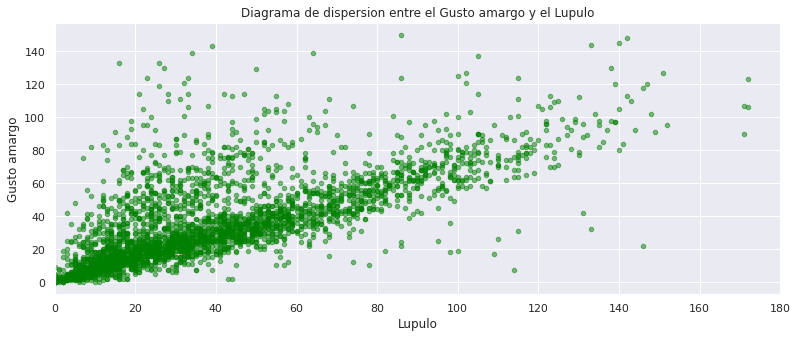

In [119]:
fig, ax = plt.subplots(figsize=(13,5))
ax.scatter(data.Hoppy, data.Bitter,s=20, alpha=0.5, color='green')
ax.set_title('Diagrama de dispersion entre el Gusto amargo y el Lupulo')
ax.set_xlabel('Lupulo')
ax.set_ylabel('Gusto amargo')

plt.xlim(0,180)

plt.show();


In [120]:
modelLu = 'Bitter ~ Hoppy'
lmLu = sm.ols(formula=modelLu, data = beer).fit()
print(lmLu.summary())

                            OLS Regression Results                            
Dep. Variable:                 Bitter   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     3302.
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:27:21   Log-Likelihood:                -13792.
No. Observations:                3197   AIC:                         2.759e+04
Df Residuals:                    3195   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.6158      0.537     21.650      0.0

Se ve una relacion mucho mas clara, lo cual tiene sentido porque el lúpulo aporta la mayor parte del amargor en la cerveza a través de sus resinas.

Aun asi, agregando una regresion para observar mejor la relacion entre el amargor y Lupulo se tiene un r^2 0,508. Valor considerado bajo, pero a comparacion de otros ingredientes es la relacion mas fuerte, como se puede ver.


**¿Y la relacion entre la malta y el gusto amargo en si?**

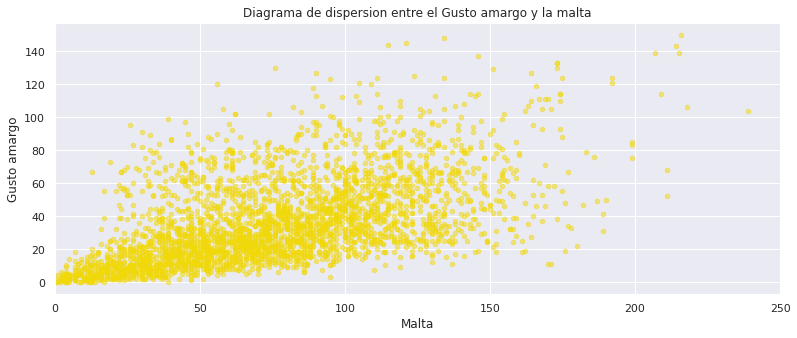

In [121]:
fig, ax = plt.subplots(figsize=(13,5))
ax.scatter(data.Malty, data.Bitter,s=20, alpha=0.5, color='#F1D809')
ax.set_title('Diagrama de dispersion entre el Gusto amargo y la malta')
ax.set_xlabel('Malta')
ax.set_ylabel('Gusto amargo')

plt.xlim(0,250)

plt.show();

In [122]:
modelMalty = 'Bitter~Malty' 
lmMalty   = sm.ols(formula = modelMalty, data = beer).fit()
print(lmMalty.summary())

                            OLS Regression Results                            
Dep. Variable:                 Bitter   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     1503.
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          9.18e-270
Time:                        16:27:26   Log-Likelihood:                -14310.
No. Observations:                3197   AIC:                         2.862e+04
Df Residuals:                    3195   BIC:                         2.864e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8313      0.804     10.987      0.0

Con una cerveza sin malta o poca se considera poco amarga, luego al aumentar la malta mantiene cierta constancia creciente en el gusto amargo.

con un r^2 de 0,320 , poco. 

Tiene sentido ya que el amargor depende un poco mas en la malta pero no mucho.

**¿y la relacion entre las frutas con el gusto amargo?**

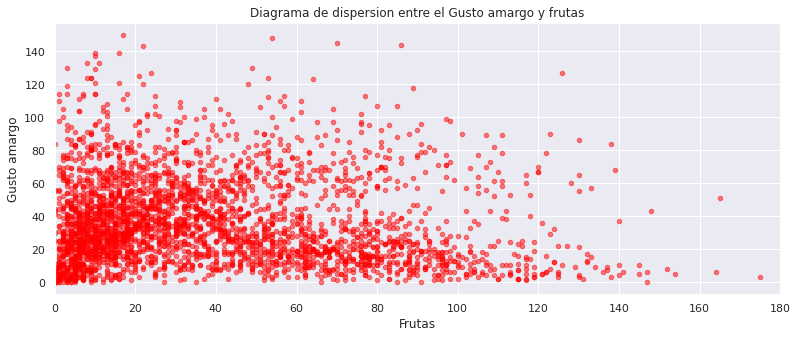

In [123]:
fig, ax = plt.subplots(figsize=(13,5))
ax.scatter(data.Fruits, data.Bitter,s=20, alpha=0.5, color='red')
ax.set_title('Diagrama de dispersion entre el Gusto amargo y frutas')
ax.set_xlabel('Frutas')
ax.set_ylabel('Gusto amargo')

plt.xlim(0,180)

plt.show();

In [124]:
modelFruits = 'Bitter~Fruits' 
lmFruits   = sm.ols(formula = modelFruits, data = beer).fit()
print(lmFruits.summary())

                            OLS Regression Results                            
Dep. Variable:                 Bitter   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     28.15
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.20e-07
Time:                        16:27:31   Log-Likelihood:                -14912.
No. Observations:                3197   AIC:                         2.983e+04
Df Residuals:                    3195   BIC:                         2.984e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.2397      0.707     55.492      0.0

Con una cerveza sin frutas o pocas, a partir de 0 algunos ya la consideran amarga, luego al aumentar las frutas mantiene cierta constancia en el gusto amargo y hasta tienden a disminuir.

con un r^2 de 0,009 , extremadamente poco, casi nulo.

Tiene sentido ya que el amargor depende en poca cantidad de las frutas.

**Relacion entre las especias y el gusto amargo en si.**

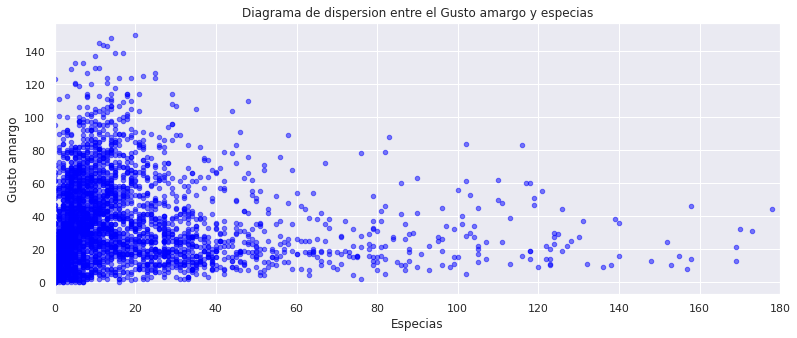

In [125]:
fig, ax = plt.subplots(figsize=(13,5))
ax.scatter(data.Spices, data.Bitter,s=20, alpha=0.5, color='blue')
ax.set_title('Diagrama de dispersion entre el Gusto amargo y especias')
ax.set_xlabel('Especias')
ax.set_ylabel('Gusto amargo')

plt.xlim(0,180)

plt.show();

In [126]:
modelSpices = 'Bitter~Spices'
lmISpices   = sm.ols(formula = modelSpices, data = beer).fit()
print(lmISpices.summary())

                            OLS Regression Results                            
Dep. Variable:                 Bitter   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     22.73
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.95e-06
Time:                        16:27:35   Log-Likelihood:                -14915.
No. Observations:                3197   AIC:                         2.983e+04
Df Residuals:                    3195   BIC:                         2.985e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.0384      0.574     66.222      0.0

Con una cerveza sin especias o pocas, a partir de 0 algunos ya la consideran amarga, luego al aumentar las especias mantiene cierta constancia en el gusto amargo.

con un r^2 de 0,007 , extremadamente poco, casi nulo.

Tiene sentido ya que el amargor depende en poca cantidad de las especias, muchos ingredientes como el lupulo agregan amargor.

**Entonces, en orden de influencia en el gusto amargo, queda:**


1.   Lupulo
2.   Malta
3.   Frutas
4.   Especias



# **¿Como estan distribuidos estos ingredientes del gusto amargo (tan gustado y caracteristico) en las cervezas?**

**Con las cervezas con puntuacion de mas de 4 puntos (muy buenas y excelentes)**

In [127]:
df_TOP = df[(df['Opinion'] == 'Muy buena') | (df['Opinion'] == 'Perfecta')]
df_TOP.shape

(2960, 27)

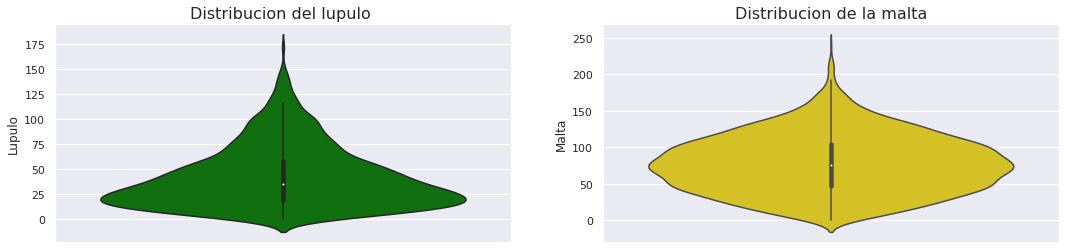

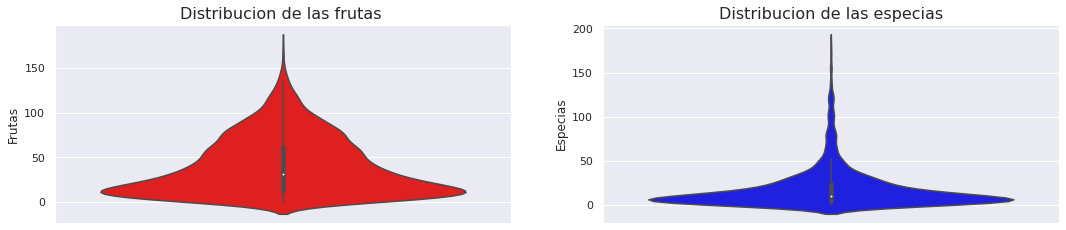

In [128]:
#Distribucion del lupulo 
plt.figure(figsize=(18,4))
plt.subplot(121)
sns.violinplot(y=df_TOP["Hoppy"], color='green')
plt.ylabel('Lupulo', fontsize=12)
plt.title('Distribucion del lupulo ', fontsize=16);

#Distribucion de la malta
plt.subplot(122)
sns.violinplot(y=df_TOP["Malty"], color='#F1D809')
plt.ylabel('Malta', fontsize=12)
plt.title('Distribucion de la malta', fontsize=16);

#Distribucion de las frutas 
plt.figure(figsize=(18,8))
plt.subplot(221)
sns.violinplot(y=df_TOP["Fruits"], color='red')
plt.ylabel('Frutas', fontsize=12)
plt.title('Distribucion de las frutas ', fontsize=16);

#Distribucion de las especias 
plt.subplot(222)
sns.violinplot(y=df_TOP["Spices"], color='blue')
plt.ylabel('Especias', fontsize=12)
plt.title('Distribucion de las especias', fontsize=16);

En este caso, el gráfico de violin muestra la distribución del lúpulo en un conjunto de cervezas. Si el gráfico muestra que la mayor parte del lúpulo se encuentra entre los valores 15 y 75, significa que la mayoría de las cervezas tienen una cantidad de lúpulo en ese rango. Es posible que haya algunas cervezas con cantidades de lúpulo más bajas o más altas, pero la mayoría se encuentran en ese rango. El lúpulo es un ingrediente importante en la elaboración de cerveza, ya que proporciona sabor y aroma característicos y actúa como conservante natural. La cantidad de lúpulo utilizada en la elaboración de una cerveza puede variar según el estilo y el sabor deseado.


El gráfico muestra que la mayor parte de la malta se encuentra entre los valores 40 y 130, significa que la mayoría de las cervezas tienen una cantidad de malta en ese rango. Es posible que haya algunas cervezas con cantidades de malta más bajas o más altas, pero la mayoría se encuentran en ese rango.


El gráfico de violin muestra que la mayor parte de las frutas (cervezas) está entre los valores 0 y 80, esto puede indicar que la mayoría de las frutas (cervezas) tienen un valor entre 0 y 80. Esto puede ser útil para entender qué tan común es que las frutas (cervezas) tengan un valor en ese rango y cómo se comparan con otros valores.


El contenido de especias de diferentes cervezas, un gráfico de violin que muestra que la mayoría de las cervezas tienen un contenido de especias entre 0 y 20 podría indicar que la mayoría de las cervezas contiene poco de este ingrediente. Sin embargo, es necesario tener en cuenta otros factores, como el tipo de cerveza y la región donde se produce, para obtener una interpretación más completa de los datos.


# **Comparaciones de estilos de cervezas y la opinion de las mismas ¿Cuales estilos gustan mas y cuales menos? Analisis**


In [129]:
df_data = pd.DataFrame(beer)
df = df_data[['Style','ABV','IBUProm','Astringency','Body','Alcohol','Bitter','Sweet', 'Sour','Salty','Fruits','Hoppy',
              'Spices','Malty','review_aroma','review_appearance','review_palate','review_taste','review_overall','Opinion']]
df.head(1)

,Style,ABV,IBUProm,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,Opinion
0,Altbier,5.3,37.5,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,Muy buena


Vemos las opiniones segun los estilos de cervezas, con la idea de seleccionar los estilo mas puntuados con los menos gustados para hacer asi comparaciones de gustos.

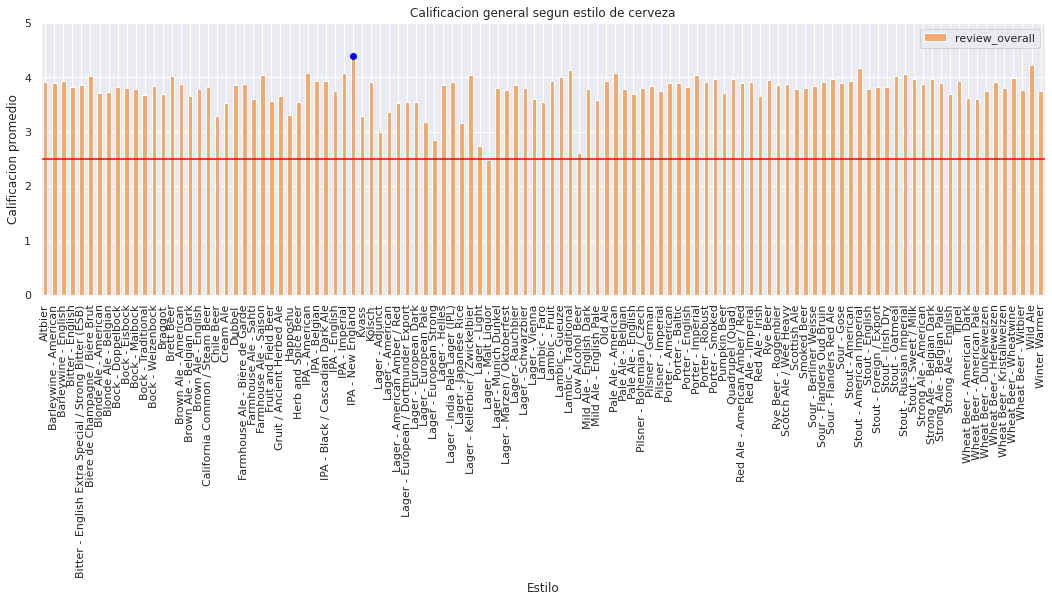

In [130]:
fig, ax = plt.subplots(figsize=(18,5))
df.groupby('Style')['review_overall'].mean().plot(kind='bar', legend='Reverse', color='#F2AB6D' )
ax.set_title('Calificacion general segun estilo de cerveza')
ax.set_xlabel('Estilo')
ax.set_ylabel('Calificacion promedio')

plt.ylim(0,5)
plt.axhline(y=2.5, c='red')
plt.plot(34,4.4, marker="o", color="blue")

plt.show();

En orden  de puntuacion:
1.   Wild Ale
1.   Altbier
2.   Low Alcohol Beer
2.   Lager - Malt Liquor



In [131]:
#Seleccion conveniente de cervezas mas puntuadas y menos puntuadas y vista de cantidad.
df_LAB = df[(df['Style'] == 'Low Alcohol Beer') | (df['Style'] == 'Altbier') | (df['Style'] == 'Wild Ale') | (df['Style'] == 'Lager - Malt Liquor')]
df_LAB.shape

(127, 20)

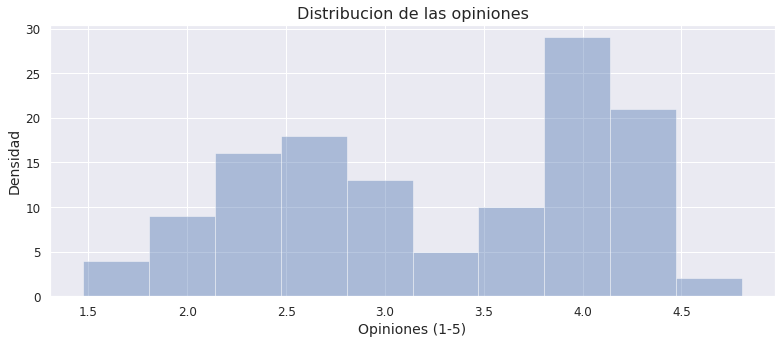

In [132]:
#Distribucion con la forma esperada
plt.figure(figsize=(13,5))
x = df_LAB['review_overall']

sns.distplot(x, bins=10, kde=False)
plt.title('Distribucion de las opiniones', fontsize=16)
plt.xlabel('Opiniones (1-5)', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Densidad', fontsize=14)
plt.yticks(fontsize=12)
plt.show();

In [133]:
#Para trabajar de manera mas organizada
df_Altbier = df[df['Style'] == 'Altbier']
df_LowAlcoholBeer = df[df['Style'] == 'Low Alcohol Beer']
df_WildAle = df[df['Style'] == 'Wild Ale']
df_LagerMaltLiquor = df[df['Style'] == 'Lager - Malt Liquor']

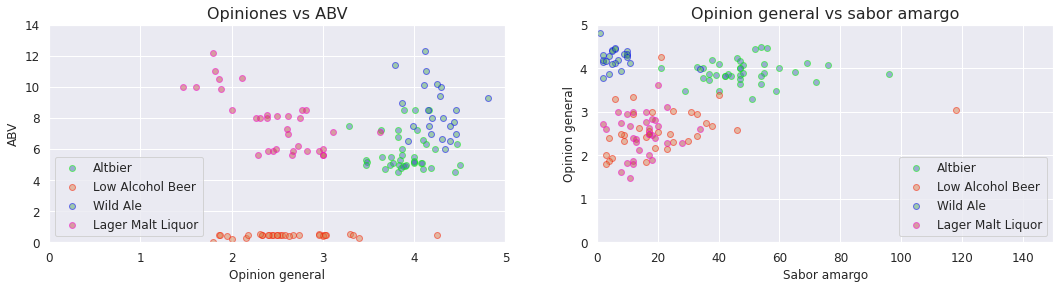

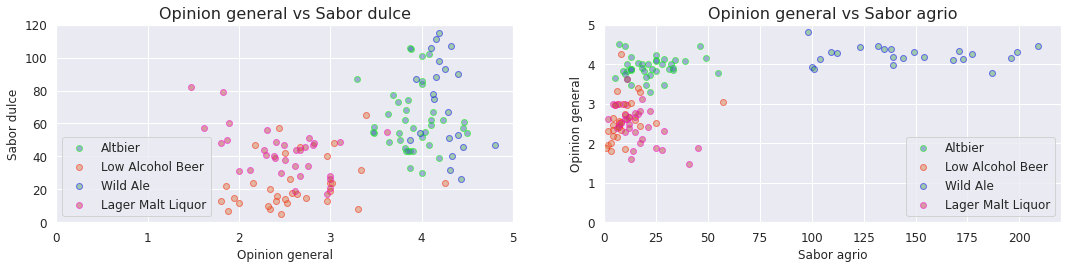

In [134]:
#Opiniones vs ABV
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.scatter(df_Altbier['review_overall'], df_Altbier['ABV'], edgecolor='#04F801', alpha=0.5, label= 'Altbier')
plt.scatter(df_LowAlcoholBeer['review_overall'], df_LowAlcoholBeer['ABV'], edgecolor='#F81B01', alpha=0.5, label= 'Low Alcohol Beer')
plt.scatter(df_WildAle['review_overall'], df_WildAle['ABV'], edgecolor='#0104F8', alpha=0.5, label= 'Wild Ale')
plt.scatter(df_LagerMaltLiquor['review_overall'], df_LagerMaltLiquor['ABV'], edgecolor='#F801CF', alpha=0.5, label= 'Lager Malt Liquor')
plt.legend(loc='best', fontsize=12)
plt.ylim(0, 14)
plt.yticks(fontsize=12)
plt.ylabel('ABV', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(0, 5)
plt.xlabel('Opinion general', fontsize=12)
plt.title('Opiniones vs ABV', fontsize=16);

#Opiniones vs sabor amargo
plt.subplot(122)
plt.scatter(df_Altbier['Bitter'], df_Altbier['review_overall'], edgecolor='#04F801', alpha=0.5, label= 'Altbier')
plt.scatter(df_LowAlcoholBeer['Bitter'], df_LowAlcoholBeer['review_overall'], edgecolor='#F81B01', alpha=0.5, label= 'Low Alcohol Beer')
plt.scatter(df_WildAle['Bitter'], df_WildAle['review_overall'], edgecolor='#0104F8', alpha=0.5, label= 'Wild Ale')
plt.scatter(df_LagerMaltLiquor['Bitter'], df_LagerMaltLiquor['review_overall'], edgecolor='#F801CF', alpha=0.5, label= 'Lager Malt Liquor')
plt.legend(loc='best', fontsize=12)
plt.xlim(0, 150)
plt.xlabel('Sabor amargo', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 5)
plt.ylabel('Opinion general', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Opinion general vs sabor amargo', fontsize=16)

#Opiniones vs sabor dulce
plt.figure(figsize=(18,8))
plt.subplot(221)
plt.scatter(df_Altbier['review_overall'], df_Altbier['Sweet'], edgecolor='#04F801', alpha=0.5, label= 'Altbier')
plt.scatter(df_LowAlcoholBeer['review_overall'], df_LowAlcoholBeer['Sweet'], edgecolor='#F81B01', alpha=0.5, label= 'Low Alcohol Beer')
plt.scatter(df_WildAle['review_overall'], df_WildAle['Sweet'], edgecolor='#0104F8', alpha=0.5, label= 'Wild Ale')
plt.scatter(df_LagerMaltLiquor['review_overall'], df_LagerMaltLiquor['Sweet'], edgecolor='#F801CF', alpha=0.5, label= 'Lager Malt Liquor')
plt.legend(loc='best', fontsize=12)
plt.xlim(0, 5)
plt.xlabel('Opinion general', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 120)
plt.ylabel('Sabor dulce', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Opinion general vs Sabor dulce', fontsize=16)

#Opiniones vs sabor agrio
plt.subplot(222)
plt.scatter(df_Altbier['Sour'], df_Altbier['review_overall'], edgecolor='#04F801', alpha=0.5, label= 'Altbier')
plt.scatter(df_LowAlcoholBeer['Sour'], df_LowAlcoholBeer['review_overall'], edgecolor='#F81B01', alpha=0.5, label= 'Low Alcohol Beer')
plt.scatter(df_WildAle['Sour'], df_WildAle['review_overall'], edgecolor='#0104F8', alpha=0.5, label= 'Wild Ale')
plt.scatter(df_LagerMaltLiquor['Sour'], df_LagerMaltLiquor['review_overall'], edgecolor='#F801CF', alpha=0.5, label= 'Lager Malt Liquor')
plt.legend(loc='best', fontsize=12)
plt.xlim(0, 220)
plt.xlabel('Sabor agrio', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 5)
plt.ylabel('Opinion general', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Opinion general vs Sabor agrio', fontsize=16)
plt.show()

**En las distribuciones basadas en el estilo es donde se encuentran las diferencias.**

Las graficas muestran algunos grupos claros. Por ejemplo, hay un grupo de opiniones alrededor del rango de ABV (Alcohol By Volume) de 4-13 en la tabla de opiniones vs ABV, lo que podría deberse al hecho de que la gente prefiere esa cantidad de alcohol, porque es la cantidad que permite un control del **efecto alcohol-consumicion**. 

También hay una franja de Lupulo (Amargor) entre 0-20 en la tabla de Opinion frente a lupulo, que valen 4 puntos de opinion aproximadamente. No está claro exactamente cuál proporcion de lupulo es la dominante en gusto, pero podrían ser la conjuncion con otros elementos como se ve luego (Ej. sabor dulce o agrio). También hay una franja de opiniones bajas donde existe menor menor.

En el gráfico de Opinion versus sabor dulce, hay una franja de personas que opinan que existe un gusto dulce entre 40 a 120 en las cervezas mas valoradas (opinion). ¿Gusto por lo dulce?

En el gráfico de Opinion versus sabor agrio, un grupo de personas que opina entre 3.5 a 5 en los estilos mas valorados tambien valora mas un sabor agrio. Los estilos menos puntuados poseen menor cantidad de este sabor.





**EN CONCLUSION:**

1.  **WILD ALE:** el ABV entre 5% y 12%, el sabor amargo entre 0 y 10, un sabor dulce entre 20 y 120, y un sabor agrio entre 100 y 200. Es la clave para la cerveza de mejor puntuacion.
DULCE, AGRIA Y MINIMO AMARGA. ALCOHOL PROMEDIO.

2.   **ALTBIER:**el ABV entre 5% y 12%, el sabor amargo entre 30 y 80, un sabor dulce entre 30 y 110, y un sabor agrio entre 0 y 50. Es la clave para la  2da cerveza de mejor puntuacion.
DULCE, AMARGA, POCO AGRIA. ALCOHOL UN POCO BAJO.

3.   **LOW ALCOHOL BEER:**el ABV 0, el sabor amargo entre 0 y 40, un sabor dulce entre 0 y 60, y un sabor agrio entre 0 y 25. Es la clave para una cerveza con opinion negativa.
POCO DULCE, POCO AGRIA, POCO AMARGA. SIN ALCOHOL.

4.   **LAGER MALT LIQUOR:**el ABV entre 6% y 12%, el sabor amargo entre 0 y 40, un sabor dulce entre 20 y 80, y un sabor agrio entre 0 y 50. Es la clave para una cerveza con opinion muy negativa.
POCO DULCE, POCO AGRIA, POCO SABOR AMARGO. ALCOHOL PROMEDIO.






# **Modelo y analisis**


In [135]:
df_data = pd.DataFrame(beer)
df1 = df_data[['ABV','IBUProm','Astringency','Body','Alcohol','Bitter','Sweet', 'Sour','Salty','Fruits','Hoppy',
              'Spices','Malty','review_aroma','review_appearance','review_palate','review_taste','review_overall']]

X = df1.drop(columns = ["review_overall"])     # feature matrix
y = df1['review_overall']                      # target feature
df1.head(1)

,ABV,IBUProm,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall
0,5.3,37.5,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082


In [136]:
X.head(2)

,ABV,IBUProm,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste
0,5.3,37.5,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863
1,7.2,37.5,12,57,18,33,55,16,0,24,35,12,84,3.798337,3.846154,3.904366,4.024948


In [137]:
y.head(2)

0    3.847082
1    4.034304
Name: review_overall, dtype: float64

**Eliminación bidireccional (stepwise)**

In [138]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [139]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
stepwise_selection(X,y)

['review_palate',
 'review_taste',
 'Alcohol',
 'ABV',
 'Sweet',
 'Spices',
 'Astringency',
 'Sour',
 'Fruits',
 'Malty',
 'Bitter',
 'Hoppy',
 'IBUProm']

In [140]:
df2 = df_data[['review_palate','review_taste','Alcohol','ABV','Sweet','Spices','Astringency','Sour','Fruits','Malty','Bitter','Hoppy','IBUProm']]

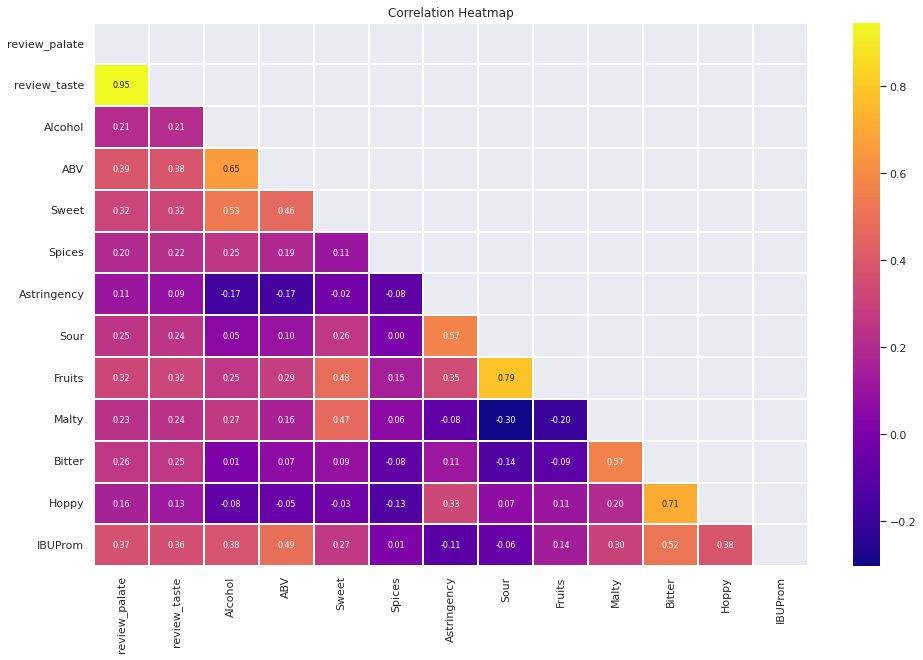

In [141]:
plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(df2.corr(),dtype = bool))
sns.heatmap(df2.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [143]:
print('Training score:', lr.score(X_train, y_train))

Training score: 0.9185000036558613


In [144]:
predictors = X_train.columns
coef = pd.Series(lr.coef_, predictors).sort_values()
print(coef)

ABV                 -0.012456
Alcohol             -0.001251
Sour                -0.001112
Bitter              -0.001077
Sweet               -0.001055
Spices              -0.000996
IBUProm             -0.000295
Body                 0.000324
Hoppy                0.000548
Malty                0.000567
Salty                0.000587
Fruits               0.000881
review_appearance    0.001501
Astringency          0.002819
review_aroma         0.017744
review_palate        0.311998
review_taste         0.602249
dtype: float64


In [145]:
print('Puntaje Testing', r2_score(y_test, y_pred))

Puntaje Testing 0.9021438166267384


In [61]:
dfm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfm.head(5)

,Actual,Predicted
1857,3.880553,3.808732
3078,3.428571,3.343267
2635,3.119048,3.270357
2032,3.441667,3.474123
3181,4.142857,3.923750


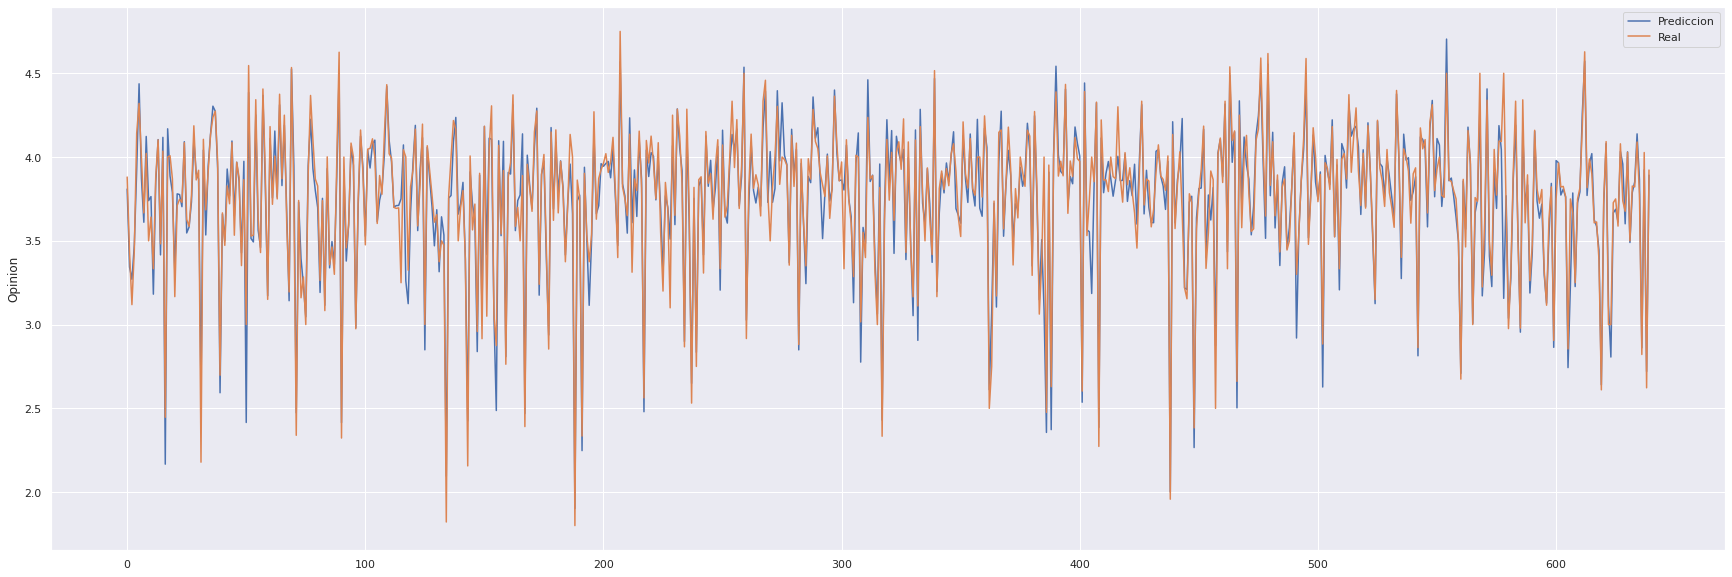

In [62]:
plt.figure(figsize = (30,10))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test.values, label='Real')

plt.ylabel('Opinion')
plt.legend()
plt.show()


Se puede ver unas predicciones casi calcadas de las reales, aunque se ven algunas pocas distorsiones. 

In [63]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test,y_pred)
print('R-Squared:',(r2))

Mean Absolute Error (MAE): 0.08743795769481358
Mean Squared Error (MSE): 0.01942284564772524
Root Mean Squared Error (RMSE): 0.13936586973762707
R-Squared: 0.9021438166267384


El error absoluto medio (MAE) resulta ser 0.08743795769481358. Esto nos dice que la diferencia promedio entre el valor real de los datos y el valor predicho por el modelo es 0.8743795769481358. Muy buen indicador.

La diferencia entre el estimador y lo que se estima es de 0.01942284564772524.

Muy buen indicador




La diferencia entre los valores, con la magnitud de estas diferencias es de 0.13936586973762707

El modelo tiene un R^2 de 0.9, significa que el 90% de las opiniones se puede explicar por 
'review_taste',
 'Alcohol',
 'review_palate',
 'ABV',
 'Sweet',
 'Spices',
 'Astringency',
 'Sour',
 'Fruits',
 'Malty',
 'Bitter',
 'Hoppy',
 'IBUProm , 
 mientras que el 10% restante se debe a otros factores que no se han considerado en el modelo.